In [15]:
import torch
from torch.autograd import Variable

## DATASET

In [16]:
dataset = [] #list of tuples (image, label)

zer = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

one = torch.Tensor([[0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1],
                   ])

two = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                   ])

thr = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

fou = torch.Tensor([[0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

fiv = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

six = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

sev = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

eig = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

nin = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

dataset.append((zer, torch.Tensor([0])))
dataset.append((one, torch.Tensor([1])))
dataset.append((two, torch.Tensor([2])))
dataset.append((thr, torch.Tensor([3])))
dataset.append((fou, torch.Tensor([4])))
dataset.append((fiv, torch.Tensor([5])))
dataset.append((six, torch.Tensor([6])))
dataset.append((sev, torch.Tensor([7])))
dataset.append((eig, torch.Tensor([8])))
dataset.append((nin, torch.Tensor([9])))



### Take a look into how the data looks like

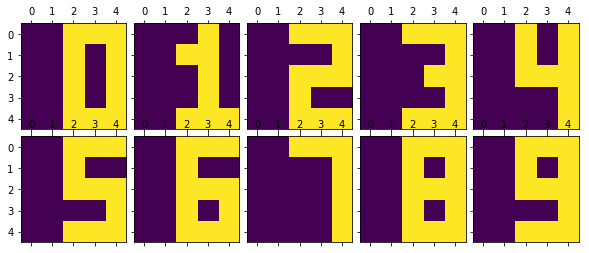

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

def showImage(path):
    image = Image.open(path)
    image.show()

fig = plt.figure(1,(10., 50.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (data, target) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(data.numpy()))
plt.show()

## MODEL

In [18]:
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.output_layer = nn.Linear(5*5, 10, bias=False)

    def forward(self, x):
        x = self.output_layer(x)
        return F.log_softmax(x)
    

In [19]:
model = Model()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.1)

## Training

#### Train for a single epoch

In [20]:
def train(model, optim, dataset):
    model.train()
    avg_loss = 0
    for i, (data, target) in enumerate(dataset):
        data = data.view(1, -1)
        data, target = Variable(data), Variable(target.long())
        optimizer.zero_grad()
        output = model(data)

        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        avg_loss += loss.data[0]
        
    return avg_loss/len(dataset)

### DATASET - MODEL - OUTPUT

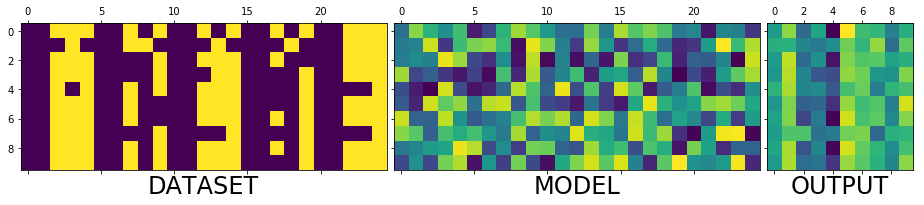

In [21]:
fig = plt.figure(1, (16., 16.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.1)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target).squeeze()
grid[0].matshow(Image.fromarray(data.numpy()))
grid[0].set_xlabel('DATASET', fontsize=24)

grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
grid[1].set_xlabel('MODEL', fontsize=24)

output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))
grid[2].set_xlabel('OUTPUT', fontsize=24)


plt.show()

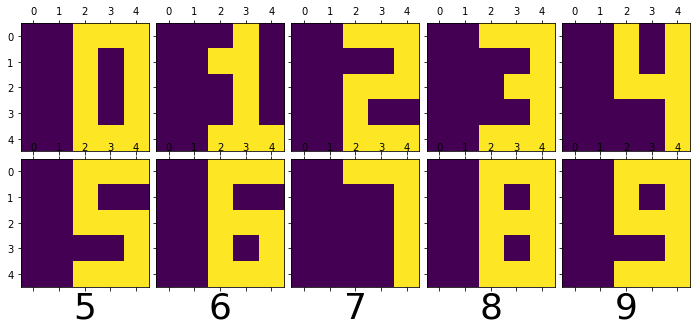

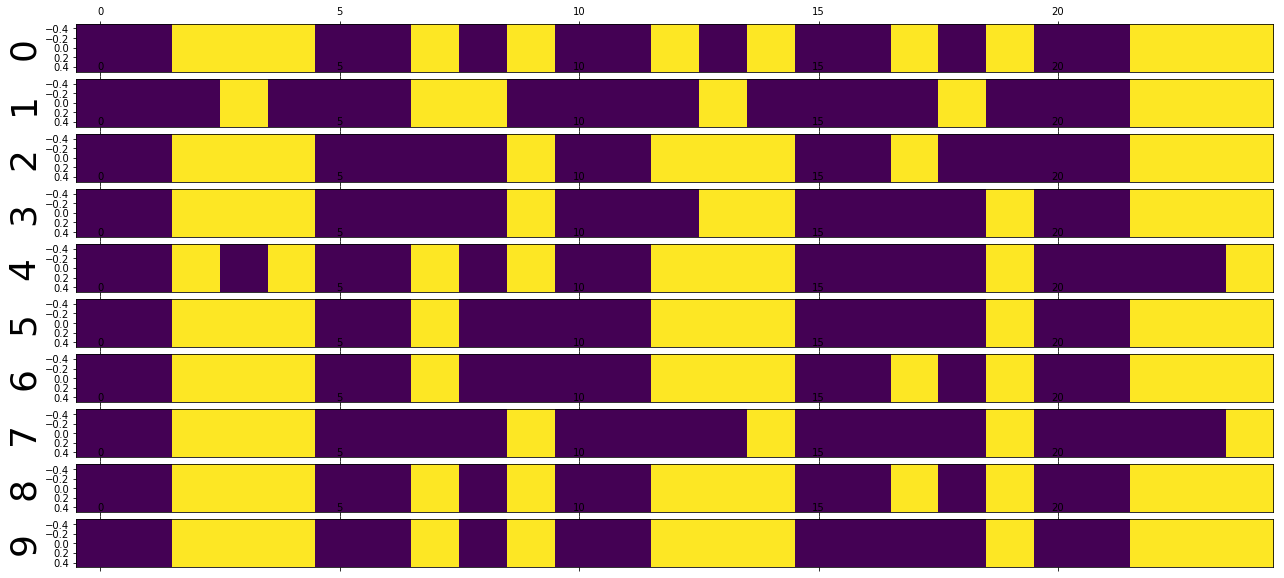

In [28]:
fig = plt.figure(1,(12., 12.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (d, t) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(d.numpy()))
    
plt.show()

fig = plt.figure(1, (100., 10.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(dataset), 1),
                     axes_pad=0.1)


data = [data.view(1, -1) for data, target in dataset]

for i, d in enumerate(data):
    grid[i].matshow(Image.fromarray(d.numpy()))
    grid[i].set_ylabel('{}'.format(i), fontsize=36)


#### How many correct predictions without any training

In [24]:
pred = output.data.max(1)[1].squeeze()
correct = pred.eq(target.long()).sum()
print('correct: {}/{}'.format(correct, len(dataset)))

correct: 0/10


### lets combine the above two blocks and make a function out of it

In [25]:
def test_and_print(model, dataset, plot=True):
      
    data = [data.view(-1) for data, target in dataset]
    data = torch.stack(data).squeeze()

    target = [target.view(-1) for data, target in dataset]
    target = torch.stack(target).squeeze()
    output = model(Variable(data))
        
    loss = F.nll_loss(output, Variable(target.long()))
    
    dataset_img = Image.fromarray(data.numpy())
    model_img   = Image.fromarray(model.output_layer.weight.data.numpy())
    output_img  = Image.fromarray(output.data.numpy())
    
    pred = output.data.max(1)[1] 
    correct = pred.eq(target.long()).sum()
    
    if plot:
        fig = plt.figure(1,(16., 16.))
        grid = ImageGrid(fig, 111,
                         nrows_ncols=(1 , 3),
                         axes_pad=0.1)

        grid[0].matshow(dataset_img)
        grid[0].set_xlabel('DATASET', fontsize=24)

        grid[1].matshow(model_img)
        grid[1].set_xlabel('MODEL', fontsize=24)
        
        grid[2].matshow(output_img)
        grid[2].set_xlabel('OUTPUT', fontsize=24)
        
        plt.show()    
        
    print('correct: {}/{}, loss:{}'.format(correct, len(dataset), loss.data[0]))
        
    return dataset_img, model_img, output_img 

### Lets take a closer look
with help from, https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib

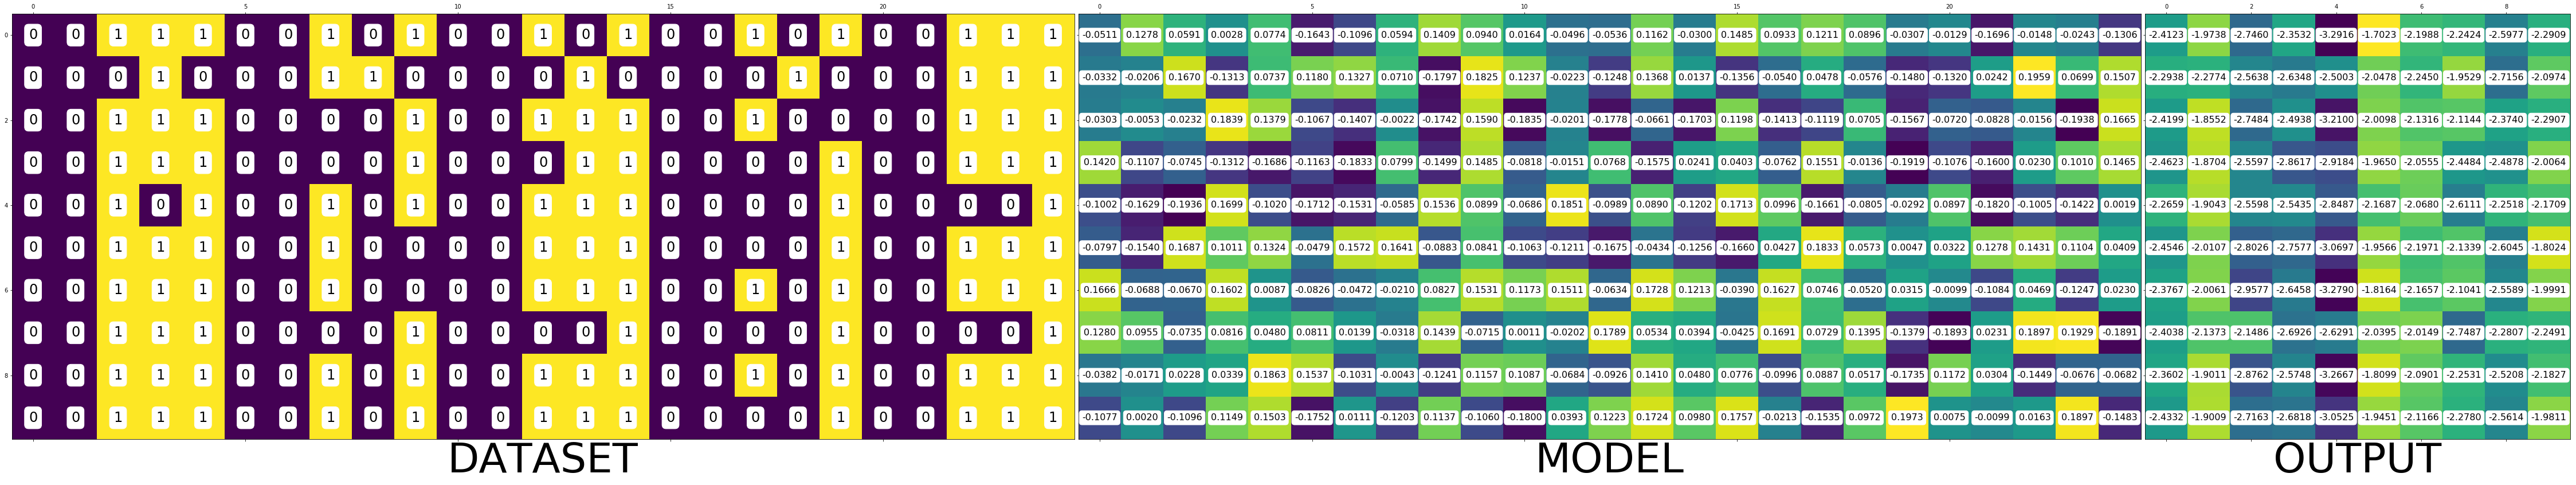

In [26]:
import numpy
fig = plt.figure(1, (80., 80.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.1)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target)

grid[0].matshow(Image.fromarray(data.numpy()))
grid[0].set_xlabel('DATASET', fontsize=72)
for (x,y), val in numpy.ndenumerate(data.numpy()):
     grid[0].text(y, x, '{:d}'.format(int(val)), ha='center', va='center', fontsize=24,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

        
grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
grid[1].set_xlabel('MODEL', fontsize=72)
for (x,y), val in numpy.ndenumerate(model.output_layer.weight.data.numpy()):
     grid[1].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))
grid[2].set_xlabel('OUTPUT', fontsize=72)
for (x,y), val in numpy.ndenumerate(output.data.numpy()):
     grid[2].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


plt.show()

In [27]:
print(model(Variable(data[0].view(1, -1))))

Variable containing:
-2.4123 -1.9738 -2.7460 -2.3532 -3.2916 -1.7023 -2.1988 -2.2424 -2.5977 -2.2909
[torch.FloatTensor of size 1x10]



In [ ]:
import numpy
def plot_with_values(model, dataset):
    fig = plt.figure(1, (80., 80.))
    grid = ImageGrid(fig, 111,
                         nrows_ncols=(1, 3),
                         axes_pad=0.5)


    data = [data.view(-1) for data, target in dataset]
    data = torch.stack(data)

    target = [target.view(-1) for data, target in dataset]
    target = torch.stack(target)

    grid[0].matshow(Image.fromarray(data.numpy()))
    grid[0].set_xlabel('DATASET', fontsize=144)
    for (x,y), val in numpy.ndenumerate(data.numpy()):
         grid[0].text(y, x, '{:d}'.format(int(val)), ha='center', va='center', fontsize=24,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


    grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
    grid[1].set_xlabel('MODEL', fontsize=144)
    for (x,y), val in numpy.ndenumerate(model.output_layer.weight.data.numpy()):
         grid[1].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

    output = model(Variable(data))
    grid[2].matshow(Image.fromarray(output.data.numpy()))
    grid[2].set_xlabel('OUTPUT', fontsize=144)
    for (x,y), val in numpy.ndenumerate(output.data.numpy()):
         grid[2].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


    plt.show()

### Before Training


In [ ]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

#### Train the model once and see how it works

In [ ]:
train(model, optimizer, dataset)

In [ ]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

#### train once more and see the internals

In [ ]:
train(model, optimizer, dataset)

In [ ]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

In [ ]:
print(data)
print(model.output_layer.weight.data)
print(output.data)

### Train over multiple epochs

In [ ]:
def train_epochs(epochs, model, optim, dataset, print_every=100):
    snaps = []
    for epoch in range(epochs):
        avg_loss = train(model, optim, dataset)
        if not epoch % print_every:
            print('epoch: {}, loss:{}'.format(epoch, avg_loss/len(dataset)/10))
            snaps.append(test_and_print(model, dataset))
            
    return snaps

In [ ]:
model = Model()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.1)

In [ ]:
snaps = train_epochs(100, model, optimizer, dataset)

In [ ]:
fig = plt.figure(1, (16., 16.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(snaps) , 3),
                     axes_pad=0.1)

for i, snap in enumerate(snaps):
    for j, image in enumerate(snap):
        grid[i * 3 + j].matshow(image)
        
grid[i * 3 + 0].set_xlabel('DATASET', fontsize=24)
grid[i * 3 + 1].set_xlabel('MODEL', fontsize=24)
grid[i * 3 + 2].set_xlabel('OUTPUT', fontsize=24)
        
plt.show()

In [ ]:
snaps = train_epochs(10000, model, optimizer, dataset, print_every=1000)